In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [246]:

master=pd.read_excel('master_dup_removed.xlsx')
master.head()

,participant_id,age,sex,BMI,handedness,education_category,NEO_N,NEO_E,NEO_O,NEO_A,...,CC_Mid_Anterior,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles
0,sub-0001,26.25,F,24.0,right,applied,35,44,37,39,...,474.1,954.7,431722.308490,412508.155809,52096,579143.308490,1.104817,12,15,27
1,sub-0002,21.00,F,23.0,right,academic,27,53,40,48,...,534.4,1007.6,551229.524399,511140.955357,61775,729961.524399,0.946018,12,3,15
2,sub-0003,23.00,M,22.0,right,academic,35,40,43,37,...,624.5,875.2,484203.743223,488806.827011,55089,666343.743223,1.121519,7,8,15
3,sub-0004,23.50,F,22.0,right,applied,29,47,41,48,...,488.8,952.1,490562.774910,424675.040008,57767,666421.774910,1.046196,14,9,23
4,sub-0005,21.75,M,19.0,ambidextrous,applied,26,35,40,38,...,683.6,941.4,549885.250985,473013.916100,60987,723713.250985,0.981137,17,12,29


In [247]:
master.shape

(1362, 136)

In [248]:
test_master=pd.read_excel('master_dup_removed.xlsx')

## Notes about the data
1- Sex column has F-M and female-male

2- Age doesn't look normally distributed --> Scaling

3- Is education level proportional to general population? Does it matter?

4- NEO-E Skewed norm dist

5- Only NeoC has a null value (1)


In [5]:
master['lh_bankssts_thickness'].isnull().sum()

0

<AxesSubplot:xlabel='NEO_N', ylabel='Count'>

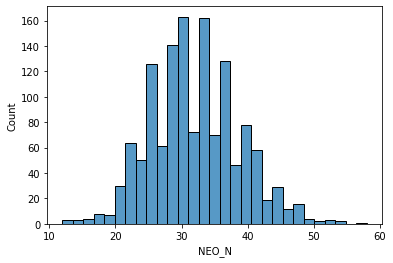

In [6]:
import seaborn as sns
sns.histplot(master['NEO_N'])

In [7]:
master.describe()

,age,BMI,NEO_N,NEO_E,NEO_O,NEO_A,NEO_C,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,...,CC_Mid_Anterior,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles
count,1353.000000,1353.000000,1362.000000,1362.000000,1362.000000,1362.000000,1361.000000,1362.000000,1362.000000,1362.000000,...,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000
mean,22.611604,23.452328,32.044053,42.367841,41.140969,41.480910,39.625276,2.612562,2.834280,2.668168,...,624.399192,963.657562,505229.693427,473428.713726,60587.881791,682682.797686,0.982964,21.950808,21.265786,43.216593
std,1.768582,4.461636,6.673963,5.752341,6.254869,5.790108,6.724346,0.150417,0.215096,0.148599,...,154.322225,158.217013,50983.978778,56343.418310,5150.041764,63571.059593,0.113214,12.559680,11.654838,23.134134
min,18.250000,0.000000,12.000000,19.000000,22.000000,25.000000,19.000000,2.112000,2.226000,2.214000,...,319.900000,401.700000,365486.667586,342083.173660,46019.000000,504960.667586,0.839635,0.000000,0.000000,3.000000
25%,21.250000,21.000000,27.000000,38.000000,37.000000,37.250000,35.000000,2.509000,2.685250,2.565000,...,508.750000,853.950000,469216.989462,432865.675953,56841.250000,636360.663303,0.900092,13.000000,12.000000,26.000000
50%,22.500000,23.000000,32.000000,43.000000,41.000000,42.000000,39.000000,2.611000,2.823000,2.671000,...,600.150000,951.350000,502938.890146,468810.834881,60534.500000,679474.039146,0.930576,20.000000,20.000000,41.500000
75%,24.000000,25.000000,36.000000,47.000000,46.000000,46.000000,44.000000,2.709000,2.968750,2.770750,...,717.075000,1057.650000,538850.629653,509955.141002,64040.250000,727203.990361,1.053637,29.000000,28.000000,56.000000
max,26.250000,47.000000,58.000000,58.000000,58.000000,58.000000,59.000000,3.164000,3.663000,3.169000,...,1482.400000,1614.400000,687593.232218,666177.675324,79412.000000,900769.417400,1.430946,120.000000,106.000000,226.000000


<AxesSubplot:xlabel='NEO_C', ylabel='Count'>

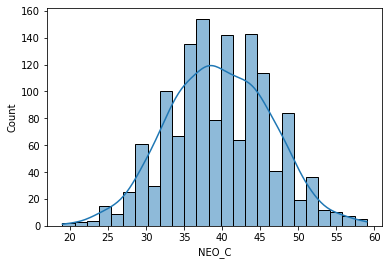

In [158]:
sns.histplot(test_master['NEO_C'],kde='True')

/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


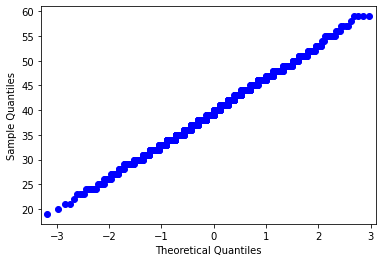

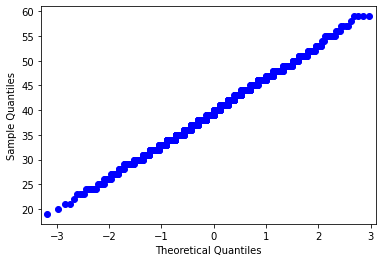

In [201]:
from statsmodels.graphics.gofplots import qqplot
qqplot(test_master['NEO_C'])

In [180]:
from scipy.stats import shapiro
stat, p = shapiro(test_master['NEO_C'])
p

1.0

In [183]:
from scipy.stats import normaltest
stat, p = normaltest(test_master['NEO_C'])
stat

nan

In [187]:
norm_y=test_master[['NEO_N','NEO_C','NEO_A','NEO_E','NEO_O']]

In [195]:
stat, p = normaltest(norm_y)
p

array([1.08909146e-03,            nan, 1.05964667e-02, 1.48356568e-07,
       1.90207931e-03])

In [196]:
x = ["e","a","b"]
y = x[1:]
y[0] = "g"
print(x)

['e', 'a', 'b']


## Finding clusters

In [249]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA


### K Means clusters

In [259]:
clusters = KMeans(n_clusters=5)

In [260]:
y=master[['NEO_N','NEO_C','NEO_A','NEO_E','NEO_O']]
y

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,35,48.0,39,44,37
1,27,34.0,48,53,40
2,35,38.0,37,40,43
3,29,41.0,48,47,41
4,26,45.0,38,35,40
...,...,...,...,...,...
1357,40,32.0,38,39,47
1358,28,40.0,34,41,48
1359,27,45.0,41,44,46
1360,35,41.0,45,32,44


In [261]:
cat_y=master[['NEO_N','NEO_C','NEO_A','NEO_E','NEO_O']]

In [262]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
y=pd.DataFrame(imputer.fit_transform(y),columns=y.columns)
y

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,35.0,48.0,39.0,44.0,37.0
1,27.0,34.0,48.0,53.0,40.0
2,35.0,38.0,37.0,40.0,43.0
3,29.0,41.0,48.0,47.0,41.0
4,26.0,45.0,38.0,35.0,40.0
...,...,...,...,...,...
1357,40.0,32.0,38.0,39.0,47.0
1358,28.0,40.0,34.0,41.0,48.0
1359,27.0,45.0,41.0,44.0,46.0
1360,35.0,41.0,45.0,32.0,44.0


In [263]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(y)


StandardScaler()

In [264]:
y = pd.DataFrame(scaler.transform(y), columns=y.columns)
y

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,0.443070,1.246413,-0.428631,0.283842,-0.662282
1,-0.756058,-0.837097,1.126315,1.848997,-0.182480
2,0.443070,-0.241809,-0.774175,-0.411782,0.297323
3,-0.456276,0.204658,1.126315,0.805561,-0.022546
4,-0.905949,0.799947,-0.601403,-1.281313,-0.182480
...,...,...,...,...,...
1357,1.192525,-1.134742,-0.601403,-0.585688,0.937059
1358,-0.606167,0.055836,-1.292490,-0.237876,1.096993
1359,-0.756058,0.799947,-0.083088,0.283842,0.777125
1360,0.443070,0.204658,0.607999,-1.803031,0.457257


In [265]:
clusters.fit(y)

KMeans(n_clusters=5)

In [266]:
clusters.fit_transform(y)

array([[1.95686779, 1.49428323, 2.39461164, 2.71555702, 2.12004375],
       [3.44977062, 2.3323978 , 2.94842145, 3.20295015, 2.23623795],
       [1.3572955 , 2.31558486, 0.9975049 , 1.6640498 , 2.31517763],
       ...,
       [2.44074366, 1.74735056, 2.09821036, 2.63483138, 0.79556425],
       [1.76608242, 2.94656781, 2.88812159, 1.57861756, 2.75477902],
       [1.87367461, 1.34617041, 1.56276473, 2.10017647, 1.56746519]])

In [267]:
centers=pd.DataFrame(scaler.inverse_transform(clusters.cluster_centers_),columns=y.columns)
centers

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,33.192857,38.482143,39.853571,36.467857,36.314286
1,27.333333,43.898246,42.838596,45.024561,35.368421
2,34.194539,34.924915,35.378840,44.508532,44.744027
3,39.280543,35.361991,45.411765,38.728507,44.285068
4,27.773852,44.646643,44.971731,46.155477,45.544170


In [268]:
clusters.labels_

array([1, 4, 2, ..., 4, 3, 1], dtype=int32)

In [269]:
target_label=clusters.labels_

In [270]:
master['target']=target_label
master

,participant_id,age,sex,BMI,handedness,education_category,NEO_N,NEO_E,NEO_O,NEO_A,...,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,target
0,sub-0001,26.25,F,24.0,right,applied,35,44,37,39,...,954.7,431722.308490,412508.155809,52096,579143.308490,1.104817,12,15,27,1
1,sub-0002,21.00,F,23.0,right,academic,27,53,40,48,...,1007.6,551229.524399,511140.955357,61775,729961.524399,0.946018,12,3,15,4
2,sub-0003,23.00,M,22.0,right,academic,35,40,43,37,...,875.2,484203.743223,488806.827011,55089,666343.743223,1.121519,7,8,15,2
3,sub-0004,23.50,F,22.0,right,applied,29,47,41,48,...,952.1,490562.774910,424675.040008,57767,666421.774910,1.046196,14,9,23,4
4,sub-0005,21.75,M,19.0,ambidextrous,applied,26,35,40,38,...,941.4,549885.250985,473013.916100,60987,723713.250985,0.981137,17,12,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,sub-1358,22.25,male,21.0,right,medium,40,39,47,38,...,887.2,517851.745617,517310.502374,66447,711842.745617,0.921517,19,23,42,3
1358,sub-1359,25.25,male,30.0,right,medium,28,41,48,34,...,853.7,519398.357112,565436.699430,65260,718521.357112,0.933091,20,34,54,2
1359,sub-1360,20.75,male,22.0,right,high,27,44,46,41,...,1128.7,567440.125601,469283.579026,61988,756582.125601,0.881901,20,33,53,4
1360,sub-1361,24.25,female,35.0,right,medium,35,32,44,45,...,1005.8,441752.267831,442438.198680,55159,595460.267831,1.003723,31,34,65,3


In [61]:
master.target.value_counts()

1    290
3    285
0    285
4    274
2    228
Name: target, dtype: int64

### Gaussian clusters

In [271]:
from sklearn.mixture import GaussianMixture
gaussian_clusters = GaussianMixture(n_components=5, random_state=0)

In [272]:
gaussian_clusters.fit(y)

GaussianMixture(n_components=5, random_state=0)

In [273]:
gaussian_clusters.means_

array([[ 0.36939452,  0.03377824,  0.70017181, -0.1186042 ,  0.47495203],
       [-0.0879497 , -0.42000532, -0.61562154,  0.46988289,  0.27763802],
       [-0.10964357,  0.12263497, -0.14701913, -0.57167953, -0.61590809],
       [-0.798865  ,  0.83230298,  0.53962362,  0.71891071, -0.06264678],
       [ 1.02353298, -0.71047431, -0.27873605, -0.74534831,  0.09162942]])

In [274]:
gaussian_centers=pd.DataFrame(scaler.inverse_transform(gaussian_clusters.means_),columns=y.columns)
gaussian_centers

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,34.508473,39.851787,45.533492,41.685840,44.110641
1,31.457295,36.802621,37.917704,45.069776,42.876921
2,31.312564,40.448853,40.629966,39.080553,37.289959
3,26.714415,45.217417,44.604242,46.501743,40.749266
4,38.872565,34.850835,39.867591,38.081918,41.713889


In [275]:
gaussian_target=gaussian_clusters.predict(y)

In [276]:
master['gaussian_target']=gaussian_target
master

,participant_id,age,sex,BMI,handedness,education_category,NEO_N,NEO_E,NEO_O,NEO_A,...,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,target,gaussian_target
0,sub-0001,26.25,F,24.0,right,applied,35,44,37,39,...,431722.308490,412508.155809,52096,579143.308490,1.104817,12,15,27,1,3
1,sub-0002,21.00,F,23.0,right,academic,27,53,40,48,...,551229.524399,511140.955357,61775,729961.524399,0.946018,12,3,15,4,1
2,sub-0003,23.00,M,22.0,right,academic,35,40,43,37,...,484203.743223,488806.827011,55089,666343.743223,1.121519,7,8,15,2,1
3,sub-0004,23.50,F,22.0,right,applied,29,47,41,48,...,490562.774910,424675.040008,57767,666421.774910,1.046196,14,9,23,4,3
4,sub-0005,21.75,M,19.0,ambidextrous,applied,26,35,40,38,...,549885.250985,473013.916100,60987,723713.250985,0.981137,17,12,29,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,sub-1358,22.25,male,21.0,right,medium,40,39,47,38,...,517851.745617,517310.502374,66447,711842.745617,0.921517,19,23,42,3,4
1358,sub-1359,25.25,male,30.0,right,medium,28,41,48,34,...,519398.357112,565436.699430,65260,718521.357112,0.933091,20,34,54,2,1
1359,sub-1360,20.75,male,22.0,right,high,27,44,46,41,...,567440.125601,469283.579026,61988,756582.125601,0.881901,20,33,53,4,3
1360,sub-1361,24.25,female,35.0,right,medium,35,32,44,45,...,441752.267831,442438.198680,55159,595460.267831,1.003723,31,34,65,3,2


### Cat clusters

In [277]:
def transform_NEON(x,std,mean):
    if x>(mean +2*std):
        return 'Upper outlier N'
    elif x>(mean+std):
        return 'Above average N'
    elif x<(mean -2*std):
        return 'Bottom outlier N'
    elif x<(mean -std):
        return 'Below average N'
    else:
        return 'Average N'

In [278]:
def transform_NEOC(x,std,mean):
    if x>(mean +2*std):
        return 'Upper outlier C'
    elif x>(mean+std):
        return 'Above average C'
    elif x<(mean -2*std):
        return 'Bottom outlier C'
    elif x<(mean -std):
        return 'Below average C'
    else:
        return 'Average C'

In [279]:
def transform_NEOA(x,std,mean):
    if x>(mean +2*std):
        return 'Upper outlier A'
    elif x>(mean+std):
        return 'Above average A'
    elif x<(mean -2*std):
        return 'Bottom outlier A'
    elif x<(mean -std):
        return 'Below average A'
    else:
        return 'Average A'

In [280]:
def transform_NEOE(x,std,mean):
    if x>(mean +2*std):
        return 'Upper outlier E'
    elif x>(mean+std):
        return 'Above average E'
    elif x<(mean -2*std):
        return 'Bottom outlier E'
    elif x<(mean -std):
        return 'Below average E'
    else:
        return 'Average E'

In [281]:
def transform_NEOO(x,std,mean):
    if x>(mean +2*std):
        return 'Upper outlier O'
    elif x>(mean+std):
        return 'Above average O'
    elif x<(mean -2*std):
        return 'Bottom outlier O'
    elif x<(mean -std):
        return 'Below average O'
    else:
        return 'Average O'

In [282]:
cat_y['NEO_N'] = cat_y['NEO_N'].apply(transform_NEON, args=(cat_y['NEO_N'].std(), cat_y['NEO_N'].mean()))

/var/folders/hg/ml24knyn6djby4wjfxt7vnvr0000gn/T/ipykernel_69848/3741748900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_y['NEO_N'] = cat_y['NEO_N'].apply(transform_NEON, args=(cat_y['NEO_N'].std(), cat_y['NEO_N'].mean()))


In [283]:
cat_y['NEO_C'] = cat_y['NEO_C'].apply(transform_NEOC, args=(cat_y['NEO_C'].std(), cat_y['NEO_C'].mean()))

/var/folders/hg/ml24knyn6djby4wjfxt7vnvr0000gn/T/ipykernel_69848/3870935837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_y['NEO_C'] = cat_y['NEO_C'].apply(transform_NEOC, args=(cat_y['NEO_C'].std(), cat_y['NEO_C'].mean()))


In [284]:
cat_y['NEO_A'] = cat_y['NEO_A'].apply(transform_NEOA, args=(cat_y['NEO_A'].std(), cat_y['NEO_A'].mean()))

/var/folders/hg/ml24knyn6djby4wjfxt7vnvr0000gn/T/ipykernel_69848/2305103656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_y['NEO_A'] = cat_y['NEO_A'].apply(transform_NEOA, args=(cat_y['NEO_A'].std(), cat_y['NEO_A'].mean()))


In [285]:
cat_y['NEO_E'] = cat_y['NEO_E'].apply(transform_NEOE, args=(cat_y['NEO_E'].std(), cat_y['NEO_E'].mean()))

/var/folders/hg/ml24knyn6djby4wjfxt7vnvr0000gn/T/ipykernel_69848/699777167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_y['NEO_E'] = cat_y['NEO_E'].apply(transform_NEOE, args=(cat_y['NEO_E'].std(), cat_y['NEO_E'].mean()))


In [286]:
cat_y['NEO_O'] = cat_y['NEO_O'].apply(transform_NEOO, args=(cat_y['NEO_O'].std(), cat_y['NEO_O'].mean()))

/var/folders/hg/ml24knyn6djby4wjfxt7vnvr0000gn/T/ipykernel_69848/2108558908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_y['NEO_O'] = cat_y['NEO_O'].apply(transform_NEOO, args=(cat_y['NEO_O'].std(), cat_y['NEO_O'].mean()))


In [287]:
from kmodes.kmodes import KModes
cat_kmeans=KModes(n_clusters=5,n_jobs=-1)

In [288]:
 cat_kmeans.fit(cat_y)

KModes(n_clusters=5, n_jobs=-1)

In [289]:
cat_target=cat_kmeans.predict(cat_y)
cat_target

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [290]:
master['cat_target']=cat_target
master

,participant_id,age,sex,BMI,handedness,education_category,NEO_N,NEO_E,NEO_O,NEO_A,...,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,target,gaussian_target,cat_target
0,sub-0001,26.25,F,24.0,right,applied,35,44,37,39,...,412508.155809,52096,579143.308490,1.104817,12,15,27,1,3,0
1,sub-0002,21.00,F,23.0,right,academic,27,53,40,48,...,511140.955357,61775,729961.524399,0.946018,12,3,15,4,1,0
2,sub-0003,23.00,M,22.0,right,academic,35,40,43,37,...,488806.827011,55089,666343.743223,1.121519,7,8,15,2,1,0
3,sub-0004,23.50,F,22.0,right,applied,29,47,41,48,...,424675.040008,57767,666421.774910,1.046196,14,9,23,4,3,0
4,sub-0005,21.75,M,19.0,ambidextrous,applied,26,35,40,38,...,473013.916100,60987,723713.250985,0.981137,17,12,29,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,sub-1358,22.25,male,21.0,right,medium,40,39,47,38,...,517310.502374,66447,711842.745617,0.921517,19,23,42,3,4,4
1358,sub-1359,25.25,male,30.0,right,medium,28,41,48,34,...,565436.699430,65260,718521.357112,0.933091,20,34,54,2,1,0
1359,sub-1360,20.75,male,22.0,right,high,27,44,46,41,...,469283.579026,61988,756582.125601,0.881901,20,33,53,4,3,0
1360,sub-1361,24.25,female,35.0,right,medium,35,32,44,45,...,442438.198680,55159,595460.267831,1.003723,31,34,65,3,2,0


In [291]:
cat_kmeans.cluster_centroids_

array([['Average N', 'Average C', 'Average A', 'Average E', 'Average O'],
       ['Below average N', 'Average C', 'Above average A', 'Average E',
        'Above average O'],
       ['Below average N', 'Above average C', 'Average A', 'Average E',
        'Average O'],
       ['Above average N', 'Average C', 'Below average A', 'Average E',
        'Below average O'],
       ['Above average N', 'Below average C', 'Average A', 'Average E',
        'Above average O']], dtype='<U15')

In [292]:
master['cat_target'].value_counts()

0    1075
4      80
1      76
2      75
3      56
Name: cat_target, dtype: int64

### Quantile targets

In [360]:
from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer(n_quantiles=1350)

In [361]:
qt.fit_transform(norm_y)

array([[0.6823573 , 0.89103039, 0.32357302, 0.58450704, 0.26538176],
       [0.23869533, 0.20719051, 0.8687917 , 0.9818384 , 0.43217198],
       [0.6823573 , 0.41326909, 0.22868792, 0.32802076, 0.6097109 ],
       ...,
       [0.23869533, 0.77983692, 0.45737583, 0.58450704, 0.7664937 ],
       [0.6823573 , 0.57783543, 0.71682728, 0.04707191, 0.66382506],
       [0.39473684, 0.35656042, 0.52335063, 0.7227576 , 0.43217198]])

In [362]:
quantile_df=pd.DataFrame(qt.fit_transform(norm_y),columns=norm_y.columns)
quantile_df

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,0.682357,0.891030,0.323573,0.584507,0.265382
1,0.238695,0.207191,0.868792,0.981838,0.432172
2,0.682357,0.413269,0.228688,0.328021,0.609711
3,0.339140,0.577835,0.868792,0.779466,0.490363
4,0.191253,0.779837,0.272424,0.098962,0.432172
...,...,...,...,...,...
1357,0.881394,0.128243,0.272424,0.278354,0.817643
1358,0.287250,0.525574,0.104893,0.381764,0.857672
1359,0.238695,0.779837,0.457376,0.584507,0.766494
1360,0.682357,0.577835,0.716827,0.047072,0.663825


In [363]:
quant_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
quantile_df=pd.DataFrame(quant_imputer.fit_transform(quantile_df),columns=quantile_df.columns)

In [364]:
quantile_kmeans=KMeans(n_clusters=5)

In [365]:
quantile_kmeans.fit_predict(quantile_df)

array([2, 2, 3, ..., 4, 1, 2], dtype=int32)

In [366]:
quantile_kmeans.labels_

array([2, 2, 3, ..., 4, 1, 2], dtype=int32)

In [527]:
quantile_kmeans.cluster_centers_

array([[0.53743131, 0.4194523 , 0.26567346, 0.2772986 , 0.27935655],
       [0.73475536, 0.44807441, 0.76744407, 0.30501209, 0.530864  ],
       [0.25671794, 0.70234565, 0.6083766 , 0.64910251, 0.23348772],
       [0.69571877, 0.23245181, 0.2627325 , 0.55410433, 0.73272008],
       [0.28347276, 0.68814249, 0.59024236, 0.71989616, 0.74603355]])

In [300]:
quant_target=quantile_kmeans.labels_
master['quant_target']=quant_target
master

,participant_id,age,sex,BMI,handedness,education_category,NEO_N,NEO_E,NEO_O,NEO_A,...,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,target,gaussian_target,cat_target,quant_target
0,sub-0001,26.25,F,24.0,right,applied,35,44,37,39,...,52096,579143.308490,1.104817,12,15,27,1,3,0,0
1,sub-0002,21.00,F,23.0,right,academic,27,53,40,48,...,61775,729961.524399,0.946018,12,3,15,4,1,0,0
2,sub-0003,23.00,M,22.0,right,academic,35,40,43,37,...,55089,666343.743223,1.121519,7,8,15,2,1,0,4
3,sub-0004,23.50,F,22.0,right,applied,29,47,41,48,...,57767,666421.774910,1.046196,14,9,23,4,3,0,2
4,sub-0005,21.75,M,19.0,ambidextrous,applied,26,35,40,38,...,60987,723713.250985,0.981137,17,12,29,0,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,sub-1358,22.25,male,21.0,right,medium,40,39,47,38,...,66447,711842.745617,0.921517,19,23,42,3,4,4,4
1358,sub-1359,25.25,male,30.0,right,medium,28,41,48,34,...,65260,718521.357112,0.933091,20,34,54,2,1,0,4
1359,sub-1360,20.75,male,22.0,right,high,27,44,46,41,...,61988,756582.125601,0.881901,20,33,53,4,3,0,2
1360,sub-1361,24.25,female,35.0,right,medium,35,32,44,45,...,55159,595460.267831,1.003723,31,34,65,3,2,0,1


In [367]:
master['quant_target'].value_counts()

2    278
3    275
1    273
0    271
4    265
Name: quant_target, dtype: int64

In [368]:
quantile_kmeans.cluster_centers_

array([[0.53743131, 0.4194523 , 0.26567346, 0.2772986 , 0.27935655],
       [0.73475536, 0.44807441, 0.76744407, 0.30501209, 0.530864  ],
       [0.25671794, 0.70234565, 0.6083766 , 0.64910251, 0.23348772],
       [0.69571877, 0.23245181, 0.2627325 , 0.55410433, 0.73272008],
       [0.28347276, 0.68814249, 0.59024236, 0.71989616, 0.74603355]])

In [369]:
quantile_df.columns

Index(['NEO_N', 'NEO_C', 'NEO_A', 'NEO_E', 'NEO_O'], dtype='object')

In [370]:
y_quant=master['quant_target']
y_quant

0       0
1       0
2       4
3       2
4       3
       ..
1357    4
1358    4
1359    2
1360    1
1361    0
Name: quant_target, Length: 1362, dtype: int32

In [371]:
np.unique(y_quant,return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([271, 273, 278, 275, 265]))

## First model

In [305]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder

In [306]:
gbs=GradientBoostingClassifier()

In [307]:
master=master.drop(['NEO_N','NEO_C','NEO_A','NEO_E','NEO_O','participant_id'],axis=1)

In [308]:
master['sex'].replace('F','female',inplace=True)
master['sex'].replace('M','male',inplace=True)

In [310]:
X=master.drop(['target','gaussian_target','cat_target','quant_target'],axis=1)

In [311]:
y_kmeans=master['target']
y_gauss=master['gaussian_target']
y_cat=master['cat_target']
y_quant

0       0
1       0
2       4
3       2
4       3
       ..
1357    4
1358    4
1359    2
1360    1
1361    0
Name: quant_target, Length: 1362, dtype: int32

### Testing with KMeans

In [413]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_kmeans, test_size=0.3, random_state=42)

In [414]:
from sklearn.preprocessing import OrdinalEncoder
categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=-1)

In [314]:
X_train.dtypes.value_counts()

float64    118
int64        9
object       3
dtype: int64

#### Creating Pipeline ad Fitting

In [425]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import TransformerMixin, BaseEstimator

num_transformer = Pipeline([
    ('simple_imputer', SimpleImputer(strategy='median')),
    #('r_scaler', StandardScaler())
])


## CATEGORICAL TRANSFORMER - ONE HOT ENCODER
cat_transformer = Pipeline([
    ('simple_imputer', SimpleImputer(strategy='most_frequent')),
    ('ord_encoder', OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=-1))
])

## BUILDING THE PREPROCESSOR
preprocessor = ColumnTransformer([
        ('num_transformer', num_transformer, make_column_selector(dtype_include=['int64','float64'])),
        ('cat_transformer', cat_transformer, make_column_selector(dtype_include=['object']))],
remainder='passthrough')

/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py", line 228, in fit
    self.is_categorical_, known_categories = self._check_categories(X)
  File "/Users/paula/.pyenv/versions/3.8.6/envs/mri_personal

/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py", line 228, in fit
    self.is_categorical_, known_categories = self._check_categories(X)
  File "/Users/paula/.pyenv/versions/3.8.6/envs/mri_personal

/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py", line 228, in fit
    self.is_categorical_, known_categories = self._check_categories(X)
  File "/Users/paula/.pyenv/versions/3.8.6/envs/mri_personal

/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py", line 228, in fit
    self.is_categorical_, known_categories = self._check_categories(X)
  File "/Users/paula/.pyenv/versions/3.8.6/envs/mri_personal

In [426]:
pd.DataFrame(preprocessor.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,21.00,21.0,2.445,2.846,2.736,1.578,3.373,2.683,2.516,2.763,...,431277.839339,51381.0,638779.645434,0.927093,30.0,23.0,53.0,0.0,2.0,2.0
1,22.00,22.0,2.547,3.215,2.634,2.301,3.822,2.918,2.665,2.818,...,532115.658825,67033.0,740893.478767,0.935026,6.0,9.0,15.0,1.0,2.0,1.0
2,23.75,34.0,2.877,2.834,2.985,1.654,3.282,2.950,2.639,2.723,...,598466.530722,66530.0,813061.096886,0.911884,32.0,32.0,64.0,1.0,1.0,2.0
3,24.00,28.0,2.288,2.593,2.549,2.115,2.910,2.498,2.670,2.553,...,522160.029771,60211.0,701413.138287,1.127745,14.0,9.0,23.0,0.0,2.0,1.0
4,22.25,23.0,2.519,2.709,2.429,1.932,3.442,2.728,2.403,2.572,...,451784.130936,59678.0,621018.014764,1.116168,27.0,24.0,51.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,21.50,22.0,2.639,2.759,2.984,2.065,4.251,3.189,2.743,3.111,...,437430.889444,64925.0,758085.027526,0.883887,25.0,27.0,52.0,1.0,1.0,2.0
949,21.75,22.0,2.818,3.074,2.787,1.623,3.506,2.799,2.590,2.930,...,440214.064925,60486.0,700055.690078,0.895328,44.0,48.0,92.0,0.0,1.0,4.0
950,25.50,25.0,2.488,2.565,2.625,1.610,3.848,2.735,2.398,2.916,...,482734.470856,57160.0,622735.032821,0.905035,15.0,14.0,29.0,1.0,2.0,2.0
951,20.50,25.0,2.603,2.914,2.790,2.214,4.204,3.087,2.717,3.016,...,501473.234109,64302.0,740934.823171,0.887641,24.0,21.0,45.0,1.0,2.0,4.0


In [423]:
X_train

,age,sex,BMI,handedness,education_category,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,...,CC_Mid_Anterior,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles
1189,21.00,female,21.0,right,high,2.445,2.846,2.736,1.578,3.373,...,672.9,862.5,478136.645434,431277.839339,51381,638779.645434,0.927093,30,23,53
318,22.00,male,22.0,right,applied,2.547,3.215,2.634,2.301,3.822,...,633.5,948.5,549837.478767,532115.658825,67033,740893.478767,0.935026,6,9,15
1052,23.75,male,34.0,left,high,2.877,2.834,2.985,1.654,3.282,...,917.2,1028.3,611093.096886,598466.530722,66530,813061.096886,0.911884,32,32,64
83,24.00,female,28.0,right,applied,2.288,2.593,2.549,2.115,2.910,...,756.9,957.4,524131.138287,522160.029771,60211,701413.138287,1.127745,14,9,23
129,22.25,female,23.0,left,academic,2.519,2.709,2.429,1.932,3.442,...,476.3,885.8,456442.014764,451784.130936,59678,621018.014764,1.116168,27,24,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,21.50,male,22.0,left,high,2.639,2.759,2.984,2.065,4.251,...,477.0,1032.5,552167.027526,437430.889444,64925,758085.027526,0.883887,25,27,52
1130,21.75,female,22.0,left,medium,2.818,3.074,2.787,1.623,3.506,...,704.4,854.6,523080.690078,440214.064925,60486,700055.690078,0.895328,44,48,92
1294,25.50,male,25.0,right,high,2.488,2.565,2.625,1.610,3.848,...,768.5,915.7,460523.032821,482734.470856,57160,622735.032821,0.905035,15,14,29
860,20.50,male,25.0,right,medium,2.603,2.914,2.790,2.214,4.204,...,835.8,1181.1,552293.823171,501473.234109,64302,740934.823171,0.887641,24,21,45


In [427]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
hist_gbs = HistGradientBoostingClassifier(loss='categorical_crossentropy',categorical_features=[127,128,129])
pipeline=Pipeline([
    ('preprocessor',preprocessor),
    #('dense', FunctionTransformer(lambda x: x.todense(), accept_sparse=True)),
    ('hist_gbs', hist_gbs)
])

In [457]:
X

,age,sex,BMI,handedness,education_category,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,...,CC_Mid_Anterior,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles
0,26.25,female,24.0,right,applied,2.439,2.985,2.422,1.860,3.808,...,474.1,954.7,431722.308490,412508.155809,52096,579143.308490,1.104817,12,15,27
1,21.00,female,23.0,right,academic,2.820,2.684,2.642,2.008,3.573,...,534.4,1007.6,551229.524399,511140.955357,61775,729961.524399,0.946018,12,3,15
2,23.00,male,22.0,right,academic,2.365,2.832,2.538,1.864,3.479,...,624.5,875.2,484203.743223,488806.827011,55089,666343.743223,1.121519,7,8,15
3,23.50,female,22.0,right,applied,2.475,2.861,2.488,2.082,2.997,...,488.8,952.1,490562.774910,424675.040008,57767,666421.774910,1.046196,14,9,23
4,21.75,male,19.0,ambidextrous,applied,2.691,2.566,2.742,2.067,3.222,...,683.6,941.4,549885.250985,473013.916100,60987,723713.250985,0.981137,17,12,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,22.25,male,21.0,right,medium,2.799,2.628,2.885,1.807,3.288,...,898.8,887.2,517851.745617,517310.502374,66447,711842.745617,0.921517,19,23,42
1358,25.25,male,30.0,right,medium,2.603,2.538,2.538,1.882,3.729,...,848.9,853.7,519398.357112,565436.699430,65260,718521.357112,0.933091,20,34,54
1359,20.75,male,22.0,right,high,2.794,3.122,2.885,1.832,3.937,...,585.8,1128.7,567440.125601,469283.579026,61988,756582.125601,0.881901,20,33,53
1360,24.25,female,35.0,right,medium,2.442,2.708,2.645,1.744,3.163,...,825.9,1005.8,441752.267831,442438.198680,55159,595460.267831,1.003723,31,34,65


In [433]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(
    pipeline,
    param_grid={
        'hist_gbs__max_iter': [15,20,30,40,50],
        'hist_gbs__max_leaf_nodes':[15,20,30,40]
    },
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

In [434]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_transformer',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x12009d850>),
                                                                        ('cat_transformer',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer...
                                                                                          OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                         unknown_value=-1))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x12009df70>)])),
                                       ('hist_gbs',
                                        HistGradientBoostingClassifier(categorical_features=[127,
                                                                                             128,
                                                                                             129],
                                                                       loss='categorical_crossentropy'))]),
             n_jobs=-1,
             param_grid={'hist_gbs__max_iter': [15, 20, 30, 40, 50],
                         'hist_gbs__max_leaf_nodes': [15, 20, 30, 40]},
             scoring='accuracy')

In [435]:
predictions=grid_search.predict(X_test)

In [436]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.3080684596577017

In [437]:
grid_search.best_params_

{'hist_gbs__max_iter': 40, 'hist_gbs__max_leaf_nodes': 40}

### testing with gaussian clustering

In [438]:
from sklearn.model_selection import train_test_split
X_train_gauss, X_test_gauss, y_train_gauss, y_test_gauss = train_test_split(X, y_gauss, test_size=0.3, random_state=42)

In [439]:
grid_search_gauss = GridSearchCV(
    pipeline,
    param_grid={
        'hist_gbs__max_iter': [15,20,30,40,50],
        'hist_gbs__max_leaf_nodes':[15,20,30,40]
    },
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

In [440]:
grid_search_gauss.fit(X_train_gauss,y_train_gauss)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_transformer',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x12009d850>),
                                                                        ('cat_transformer',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer...
                                                                                          OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                         unknown_value=-1))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x12009df70>)])),
                                       ('hist_gbs',
                                        HistGradientBoostingClassifier(categorical_features=[127,
                                                                                             128,
                                                                                             129],
                                                                       loss='categorical_crossentropy'))]),
             n_jobs=-1,
             param_grid={'hist_gbs__max_iter': [15, 20, 30, 40, 50],
                         'hist_gbs__max_leaf_nodes': [15, 20, 30, 40]},
             scoring='accuracy')

In [441]:
gauss_pred=grid_search_gauss.predict(X_test_gauss)

In [442]:
gauss_score=accuracy_score(y_test_gauss,gauss_pred)
gauss_score

0.3056234718826406

### Testing with cat targets

In [443]:
from sklearn.model_selection import train_test_split
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X, y_cat, test_size=0.3, random_state=42)

In [444]:
grid_search_cat = GridSearchCV(
    pipeline,
    param_grid={
        'hist_gbs__max_iter': [15,20,30,40,50],
        'hist_gbs__max_leaf_nodes':[15,20,30,40]
    },
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

In [445]:
grid_search_cat.fit(X_train_cat,y_train_cat)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_transformer',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x12009d850>),
                                                                        ('cat_transformer',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer...
                                                                                          OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                         unknown_value=-1))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x12009df70>)])),
                                       ('hist_gbs',
                                        HistGradientBoostingClassifier(categorical_features=[127,
                                                                                             128,
                                                                                             129],
                                                                       loss='categorical_crossentropy'))]),
             n_jobs=-1,
             param_grid={'hist_gbs__max_iter': [15, 20, 30, 40, 50],
                         'hist_gbs__max_leaf_nodes': [15, 20, 30, 40]},
             scoring='accuracy')

In [446]:
cat_pred=grid_search_cat.predict(X_test_cat)

In [447]:
cat_score=accuracy_score(y_test_cat,cat_pred)
cat_score

0.7897310513447433

### Testing with quantile targets

In [448]:
from sklearn.model_selection import train_test_split
X_train_quant, X_test_quant, y_train_quant, y_test_quant = train_test_split(X, y_quant, test_size=0.3, random_state=42)

In [554]:
grid_search_quant = GridSearchCV(
    pipeline,
    param_grid={
        'hist_gbs__max_leaf_nodes':[5,8,10,15],
        'hist_gbs__max_iter':[10,15,20],
        'hist_gbs__min_samples_leaf':[5,10,15,20],
        'hist_gbs__l2_regularization':[0.01,0.1,1],
        
    },
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

In [558]:
hist_gbs=HistGradientBoostingClassifier(categorical_features=[127,128,129],max_iter=5,
                                        max_leaf_nodes=8,min_samples_leaf=10,l2_regularization=0.1)


In [555]:
grid_search_quant.fit(X,y_quant)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_transformer',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x12009d850>),
                                                                        ('cat_transformer',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x12009df70>)])),
                                       ('hist_gbs',
                                        HistGradientBoostingClassifier(categorical_features=[127,
                                                                                             128,
                                                                                             129],
                                                                       loss='categorical_crossentropy'))]),
             n_jobs=-1,
             param_grid={'hist_gbs__l2_regularization': [0.01, 0.1, 1],
                         'hist_gbs__max_iter': [10, 15, 20],
                         'hist_gbs__max_leaf_nodes': [5, 8, 10, 15],
                         'hist_gbs__min_samples_leaf': [5, 10, 15, 20]},
             scoring='accuracy')

In [556]:
quant_pred=grid_search_quant.predict(X)

In [557]:
quant_score=accuracy_score(y_quant,quant_pred)
quant_score

0.5323054331864905

In [559]:
grid_search_quant.best_params_

{'hist_gbs__l2_regularization': 0.01,
 'hist_gbs__max_iter': 10,
 'hist_gbs__max_leaf_nodes': 5,
 'hist_gbs__min_samples_leaf': 15}

In [561]:
grid_search_quant.cv_results_

{'mean_fit_time': array([0.91715837, 0.78091483, 0.73641009, 0.77337723, 1.27906866,
        1.35505762, 1.32329516, 1.14340458, 1.46981888, 1.61194739,
        1.56185222, 1.45545092, 2.67775426, 1.88778725, 2.06033306,
        2.00935879, 1.38849678, 2.01902642, 1.64995608, 1.86913686,
        2.06345482, 2.17370062, 2.16549935, 1.86748004, 2.3193233 ,
        1.95660958, 1.9725832 , 2.00777717, 2.92051311, 2.60006175,
        2.53391232, 2.61364961, 2.26078191, 1.98273258, 1.27110863,
        1.26540093, 2.89257293, 2.53484898, 2.2865458 , 1.83917437,
        2.31849003, 2.27379675, 2.79898863, 2.57110896, 4.39125681,
        3.57992167, 3.77977538, 3.39350581, 0.99823427, 0.81104274,
        0.77648697, 0.75450649, 1.21048393, 1.21299925, 1.13410101,
        1.06027555, 1.32892342, 1.32604194, 1.21400881, 1.1901268 ,
        1.99474297, 2.11028118, 1.99488158, 1.781427  , 1.17746902,
        0.9724134 , 1.00665689, 0.96137099, 1.49181862, 1.42997341,
        1.50858283, 1.53663878,

/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not impo

## cross validation

In [454]:
from sklearn.model_selection import cross_validate

In [455]:
cv_results=cross_validate(grid_search_quant,X,y_quant,return_train_score=True)

In [456]:
cv_results

{'fit_time': array([215.68865919, 296.67309999, 224.13344097, 240.15782309,
        263.82567906]),
 'score_time': array([0.05139399, 0.03577185, 0.03253293, 0.05188179, 0.02579188]),
 'test_score': array([0.23076923, 0.3003663 , 0.22426471, 0.22426471, 0.20220588]),
 'train_score': array([1.        , 1.        , 1.        , 1.        , 0.99449541])}

In [548]:
X_train_proc=preprocessor.fit_transform(X)
#X_test_proc=preprocessor.transform(X_test_quant)

In [549]:
hist_gbs=HistGradientBoostingClassifier(categorical_features=[127,128,129],max_iter=5,
                                        max_leaf_nodes=8,min_samples_leaf=10,l2_regularization=0.1)


In [550]:
hist_gbs.fit(X_train_proc,y_quant)

HistGradientBoostingClassifier(categorical_features=[127, 128, 129],
                               l2_regularization=0.1, max_iter=5,
                               max_leaf_nodes=8, min_samples_leaf=10)

In [551]:
hist_gbs.score(X_train_proc,y_quant)

0.5418502202643172

In [545]:
hist_gbs.score(X_test_proc,y_test_quant)

0.2616136919315403

In [546]:
accuracy_score(y_test_quant,hist_gbs.predict(X_test_proc))

0.2616136919315403

In [541]:
np.unique(hist_gbs.predict(X_test_proc),return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([ 68,  63, 103,  96,  79]))